In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import re

from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix

import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv("spam.csv", encoding="latin", usecols=["v1", "v2"])
df.columns = ["labels", "message"]
df.head(3)

,labels,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...


In [3]:
df["labels"].value_counts()

ham     4825
spam     747
Name: labels, dtype: int64

In [4]:
df["labels"] = df["labels"].map({"ham": 0, "spam": 1})
df.head(3)

,labels,message
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...


In [5]:
ps = PorterStemmer()
def clean_message(text):
    text = text.lower()
    text = re.sub(r"[^a-zA-Z0-9]", " ", text)
    text = text.split(" ")
    text = [word for word in text if word not in set(stopwords.words("english"))]
    text = [ps.stem(str(word)) for word in text if word]
    text = " ".join(text)
    return text

In [6]:
df["corpuse"] = df["message"].map(clean_message)
df.head(3)

,labels,message,corpuse
0,0,"Go until jurong point, crazy.. Available only ...",go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,free entri 2 wkli comp win fa cup final tkt 21...


In [7]:
X = df["corpuse"].values
y = df["labels"].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [8]:
cv = CountVectorizer()
X_train = cv.fit_transform(X_train)
X_test = cv.transform(X_test)

In [9]:
clf_nb = BernoulliNB()
clf_nb.fit(X_train, y_train)
y_pred = clf_nb.predict(X_test)

In [10]:
cm = confusion_matrix(y_test, y_pred)
ac = accuracy_score(y_test, y_pred)
ps = precision_score(y_test, y_pred)
rs = recall_score(y_test, y_pred)
print("confusion matrix ")
print(cm)
print(f"accuracy score  : {ac:.2f} ")
print(f"precision score : {ps:.2f} ")
print(f"recall score    : {rs:.2f}")

confusion matrix 
[[1452    1]
 [  44  175]]
accuracy score  : 0.97 
precision score : 0.99 
recall score    : 0.80


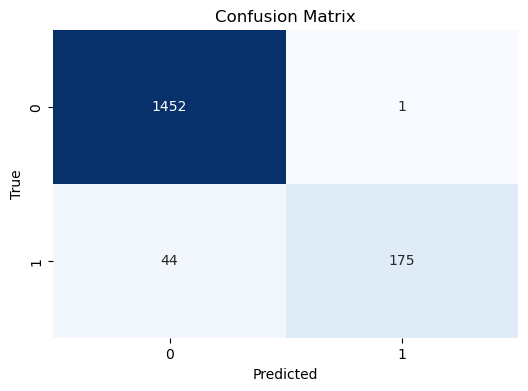

In [11]:
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()